In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/10
11/11 [==============================] - 11s 876ms/step - loss: 0.7338 - accuracy: 0.5517 - val_loss: 0.5239 - val_accuracy: 0.6437
Epoch 2/10
11/11 [==============================] - 10s 837ms/step - loss: 0.4289 - accuracy: 0.7960 - val_loss: 0.3107 - val_accuracy: 0.8621
Epoch 3/10
11/11 [==============================] - 11s 1s/step - loss: 0.2714 - accuracy: 0.8937 - val_loss: 0.1761 - val_accuracy: 0.9770
Epoch 4/10
11/11 [==============================] - 9s 784ms/step - loss: 0.1630 - accuracy: 0.9397 - val_loss: 0.0851 - val_accuracy: 0.9770
Epoch 5/10
11/11 [==============================] - 12s 1s/step - loss: 0.0776 - accuracy: 0.9828 - val_loss: 0.0776 - val_accuracy: 0.9770
Epoch 6/10
11/11 [==============================] - 17s 2s/step - loss: 0.0439 - accuracy: 0.9856 - val_loss: 0.0394 - val_accuracy: 0.9885
Epoch 7/10
11/11 [==============================] - 11s 1s/step - loss: 0.0507 - accuracy: 0.9856 - val_loss: 0.0338 - val_accuracy: 0.9885
Epoch 8/10
1

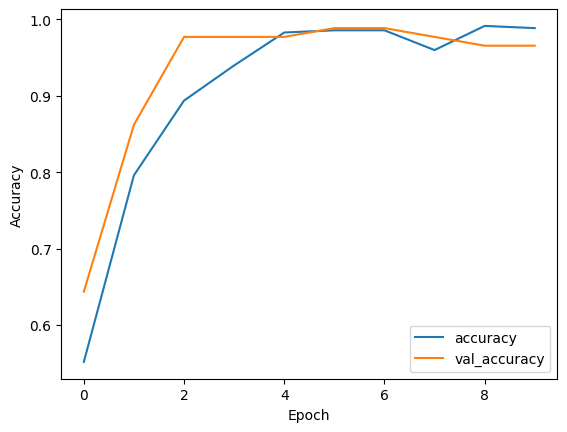

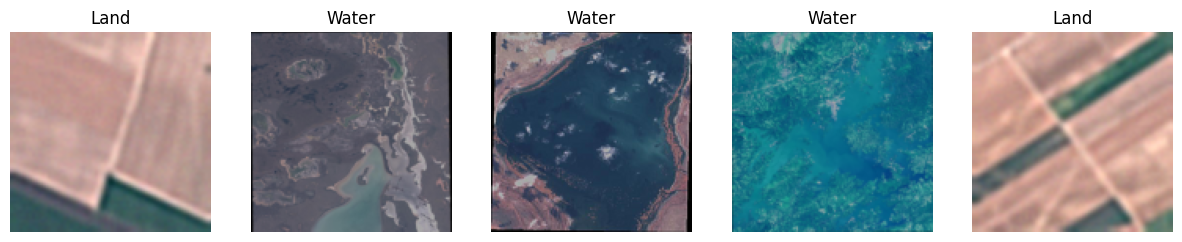

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import random

# Function to load and preprocess images
import cv2

def load_images(directory, img_size=(128, 128), sharpen=True, denoise=True):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            image = io.imread(os.path.join(directory, filename))
            if denoise:
                image = cv2.GaussianBlur(image, (5, 5), 0)
            if sharpen:
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                image = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = transform.resize(image, img_size)
            images.append(image)
            labels.append(1 if "water" in filename else 0)

    return np.array(images), np.array(labels)

images, labels = load_images("/content/drive/MyDrive/DATA/om", denoise=True, sharpen=True)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy*100,"%")

from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.round(y_pred_prob).flatten()

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

sample_indices = random.sample(range(len(images)), 5)
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[idx])
    if labels[idx] == 1:
        plt.title("Water")
    else:
        plt.title("Land")
    plt.axis('off')
plt.show()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 7s/step - accuracy: 0.4943 - loss: 0.8559 - val_accuracy: 0.7692 - val_loss: 0.7751
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - accuracy: 0.8233 - loss: 0.4139 - val_accuracy: 0.7308 - val_loss: 0.5792
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.8233 - loss: 0.3217 - val_accuracy: 0.8462 - val_loss: 0.3785
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.8958 - loss: 0.2692 - val_accuracy: 0.8846 - val_loss: 0.3294
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.9574 - loss: 0.1164 - val_accuracy: 0.9615 - val_loss: 0.2161
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.9114 - loss: 0.1565 - val_accuracy: 0.9615 - val_loss: 0.1806
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 7s/step - accuracy: 0.9602 - loss: 0.0891 - val_accuracy: 0.9231 - val_loss: 0.2251
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.9940 - loss: 0.0401

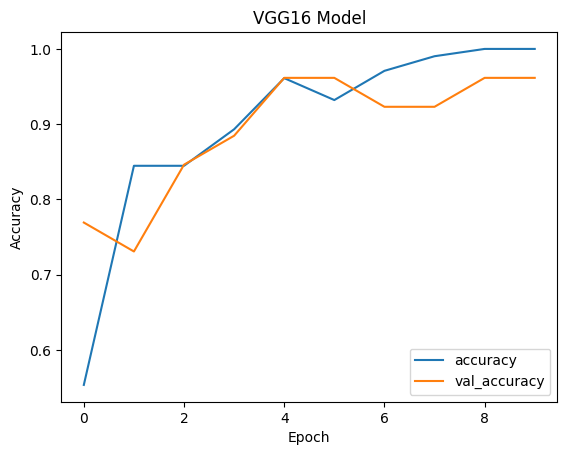

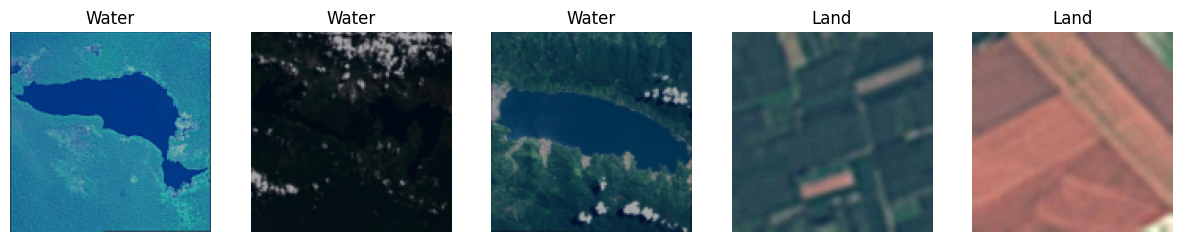

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import random

# Function to load and preprocess images
from skimage.filters import laplace

# Function to load and preprocess images including sharpening
import cv2

# Function to load and preprocess images
def load_images(directory, img_size=(128, 128), sharpen=True, denoise=True):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # assuming images are in jpg format
            image = io.imread(os.path.join(directory, filename))

            # Denoising the image using Gaussian blur
            if denoise:
                image = cv2.GaussianBlur(image, (5, 5), 0)

            # Sharpening the image using OpenCV
            if sharpen:
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # OpenCV uses BGR color format
                image = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))  # Sharpening filter
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert back to RGB

            # Resize the image
            image = transform.resize(image, img_size)
            images.append(image)
            # Assuming filename contains "water" for water images and "land" for land images
            labels.append(1 if "water" in filename else 0)
    return np.array(images), np.array(labels)

# Load images and labels with denoising and sharpening
images, labels = load_images("//content/drive/MyDrive/new mv report/new data", denoise=True, sharpen=True)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load pre-trained VGG16 model without including the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional layers so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for binary classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy*100,"%")

from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.round(y_pred_prob).flatten()

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('VGG16 Model')
plt.legend(loc='lower right')
plt.show()

# Select random indices for sample images
sample_indices = random.sample(range(len(images)), 5)

# Plot sample images
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[idx])
    if labels[idx] == 1:
        plt.title("Water")
    else:
        plt.title("Land")
    plt.axis('off')
plt.show()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.5654 - loss: 1.1602 - val_accuracy: 0.6000 - val_loss: 0.7048
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5652 - loss: 0.7277 - val_accuracy: 0.6267 - val_loss: 0.6579
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6231 - loss: 0.6410 - val_accuracy: 0.6000 - val_loss: 0.6092
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6828 - loss: 0.5885 - val_accuracy: 0.8133 - val_loss: 0.6064
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7114 - loss: 0.5785 - val_accuracy: 0.9067 - val_loss: 0.5816
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7474 - loss: 0.5641 - val_accuracy: 0.6400 - val_loss: 0.5487
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7240 - loss: 0.5371 - val_accuracy: 0.8400 - val_loss: 0.5355
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.7362 - loss: 0.5249 - val_accuracy: 0.7733 - val_loss:

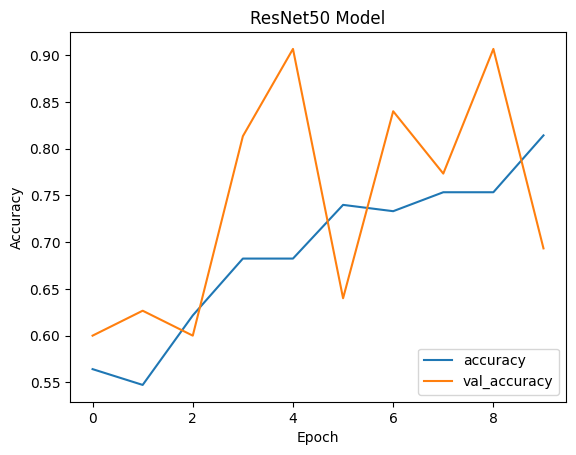

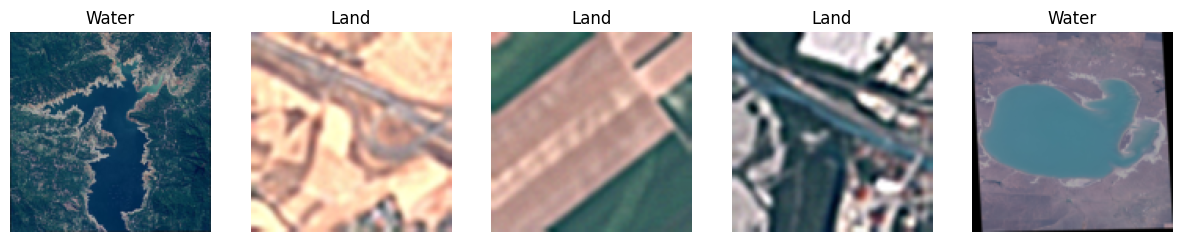

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import random
import cv2

# Function to load and preprocess images
def load_images(directory, img_size=(128, 128), sharpen=True, denoise=True):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # assuming images are in jpg format
            image = io.imread(os.path.join(directory, filename))

            # Denoising the image using Gaussian blur
            if denoise:
                image = cv2.GaussianBlur(image, (5, 5), 0)

            # Sharpening the image using OpenCV
            if sharpen:
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # OpenCV uses BGR color format
                image = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))  # Sharpening filter
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert back to RGB

            # Resize the image
            image = transform.resize(image, img_size)
            images.append(image)
            # Assuming filename contains "water" for water images and "land" for land images
            labels.append(1 if "water" in filename else 0)
    return np.array(images), np.array(labels)

# Load images and labels with denoising and sharpening
images, labels = load_images("/content/drive/MyDrive/DATA/om", denoise=True, sharpen=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load pre-trained ResNet50 model without including the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional layers so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for binary classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy*100,"%")

from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.round(y_pred_prob).flatten()

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ResNet50 Model')
plt.legend(loc='lower right')
plt.show()

# Select random indices for sample images
sample_indices = random.sample(range(len(images)), 5)

# Plot sample images
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[idx])
    if labels[idx] == 1:
        plt.title("Water")
    else:
        plt.title("Land")
    plt.axis('off')
plt.show()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5575 - loss: 1.3440 - val_accuracy: 0.8077 - val_loss: 0.6159
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8568 - loss: 0.3946 - val_accuracy: 0.7692 - val_loss: 0.7559
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9161 - loss: 0.2011 - val_accuracy: 0.9231 - val_loss: 0.5548
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9660 - loss: 0.1215 - val_accuracy: 0.9231 - val_loss: 0.7504
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9384 - loss: 0.1418 - val_accuracy: 0.9231 - val_loss: 0.6249
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9665 - loss: 0.0672 - val_accuracy: 0.9231 - val_loss: 0.6542
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0203 - val_accuracy: 0.9615 - val_loss: 0.7617
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9847 - loss: 0.0445 - val_

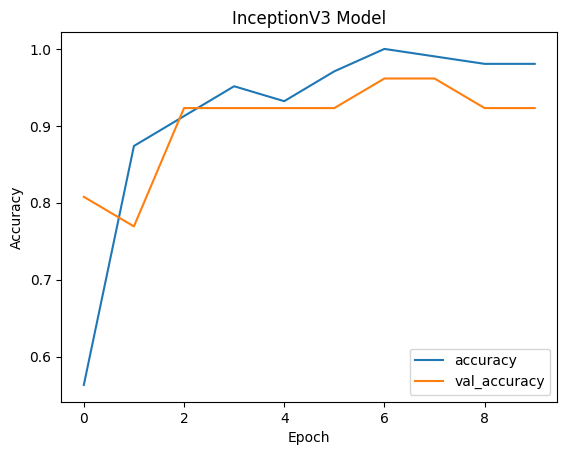

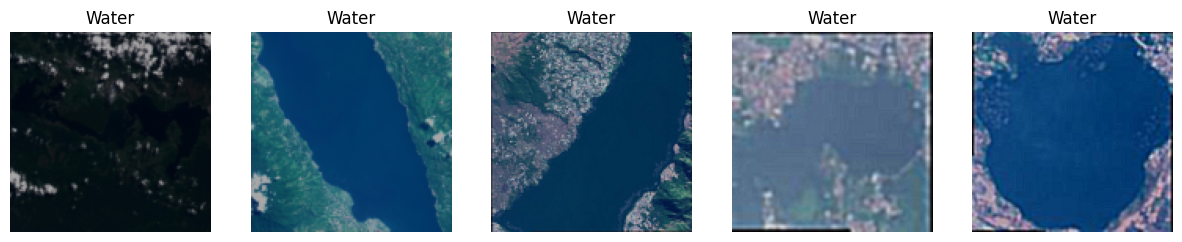

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import random
import cv2

# Function to load and preprocess images
def load_images(directory, img_size=(128, 128), sharpen=True, denoise=True):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # assuming images are in jpg format
            image = io.imread(os.path.join(directory, filename))

            # Denoising the image using Gaussian blur
            if denoise:
                image = cv2.GaussianBlur(image, (5, 5), 0)

            # Sharpening the image using OpenCV
            if sharpen:
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # OpenCV uses BGR color format
                image = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))  # Sharpening filter
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert back to RGB

            # Resize the image
            image = transform.resize(image, img_size)
            images.append(image)
            # Assuming filename contains "water" for water images and "land" for land images
            labels.append(1 if "water" in filename else 0)
    return np.array(images), np.array(labels)

# Load images and labels with denoising and sharpening
images, labels = load_images("/content/drive/MyDrive/new mv report/new data", denoise=True, sharpen=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load pre-trained InceptionV3 model without including the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional layers so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for binary classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy*100,"%")

from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.round(y_pred_prob).flatten()

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('InceptionV3 Model')
plt.legend(loc='lower right')
plt.show()

# Select random indices for sample images
sample_indices = random.sample(range(len(images)), 5)

# Plot sample images
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[idx])
    if labels[idx] == 1:
        plt.title("Water")
    else:
        plt.title("Land")
    plt.axis('off')
plt.show()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 924ms/step - accuracy: 0.5011 - loss: 8.0535 - val_accuracy: 0.8077 - val_loss: 6.0007 - learning_rate: 0.0010
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 613ms/step - accuracy: 0.9301 - loss: 4.4310 - val_accuracy: 0.8462 - val_loss: 4.7036 - learning_rate: 0.0010
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 780ms/step - accuracy: 0.9688 - loss: 3.5215 - val_accuracy: 0.8462 - val_loss: 4.4960 - learning_rate: 0.0010
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 419ms/step - accuracy: 0.9563 - loss: 3.3553 - val_accuracy: 0.8077 - val_loss: 4.9290 - learning_rate: 0.0010
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 603ms/step - accuracy: 1.0000 - loss: 2.8444 - val_accuracy: 0.8846 - val_loss: 4.0089 - learning_rate: 0.0010
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 427ms/step - accuracy: 0.9818 - loss: 2.7521 - val_accuracy: 0.9231 - val_loss: 3.1647 - learning_rate: 0.0010
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 421ms/step - accuracy: 0.9727 - loss: 2.6660 - val_accuracy: 

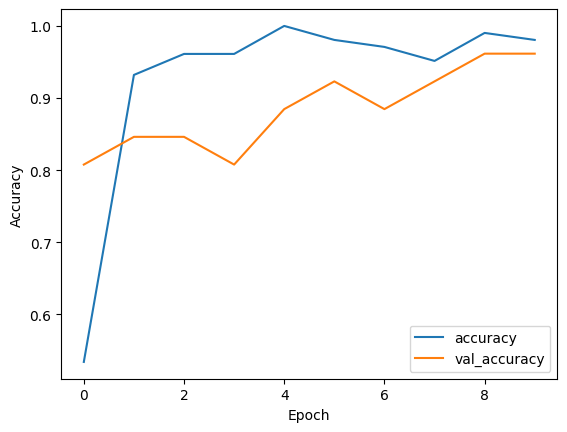

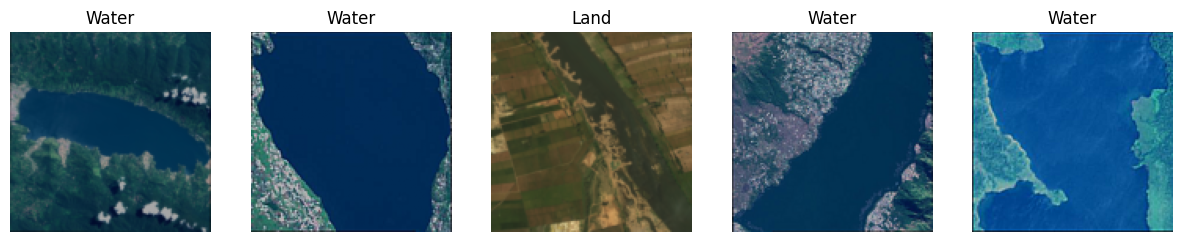

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import random
import cv2

# Function to load and preprocess images
def load_images(directory, img_size=(128, 128), sharpen=True, denoise=True):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # assuming images are in jpg format
            image = io.imread(os.path.join(directory, filename))

            # Denoising the image using Gaussian blur
            if denoise:
                image = cv2.GaussianBlur(image, (5, 5), 0)

            # Sharpening the image using OpenCV
            if sharpen:
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # OpenCV uses BGR color format
                image = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))  # Sharpening filter
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert back to RGB

            # Resize the image
            image = transform.resize(image, img_size)
            images.append(image)
            # Assuming filename contains "water" for water images and "land" for land images
            labels.append(1 if "water" in filename else 0)
    return np.array(images), np.array(labels)

# Load images and labels with denoising and sharpening
images, labels = load_images("/content/drive/MyDrive/new mv report/new data", denoise=True, sharpen=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load pre-trained MobileNetV2 model without including the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional layers so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for binary classification
from tensorflow.keras.regularizers import l2
x = Flatten()(base_model.output)
x = Dense(256, activation='relu',kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
'''model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])'''

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),callbacks=[lr_scheduler])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy*100,"%")

from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.round(y_pred_prob).flatten()

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Select random indices for sample images
sample_indices = random.sample(range(len(images)), 5)

# Plot sample images
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[idx])
    if labels[idx] == 1:
        plt.title("Water")
    else:
        plt.title("Land")
    plt.axis('off')
plt.show()
